In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%bash
# Объединяем оценки phyloP с аннотацией
bedtools intersect -a Chr1.phylop.final.bed -b A_thaliana.gff -wa -wb > merged_phyloP_gff.bed

In [2]:
# Открываем файл BED с аннотацией
columns = ["chr", "start", "end", "phyloP", "gff_chr", "gff_source", "feature_type", 
           "gff_start", "gff_end", "score", "strand", "phase", "attributes"]
df = pd.read_csv("merged_phyloP_gff.bed", sep="\t", names=columns)
df

,chr,start,end,phyloP,gff_chr,gff_source,feature_type,gff_start,gff_end,score,strand,phase,attributes
0,Chr1,0,1,1.946,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
1,Chr1,1,2,2.285,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
2,Chr1,2,3,2.388,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
3,Chr1,3,4,1.772,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
4,Chr1,4,5,-0.911,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120800936,Chr1,30427642,30427643,0.470,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
120800937,Chr1,30427643,30427644,0.344,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
120800938,Chr1,30427644,30427645,0.344,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1
120800939,Chr1,30427645,30427646,0.344,Chr1,TAIR10,chromosome,1,30427671,.,.,.,ID=Chr1;Name=Chr1


codon_position
1    2.464974
2    2.623926
3    1.272286
4    1.333701
5    2.653251
6    2.449158
Name: phyloP, dtype: float64


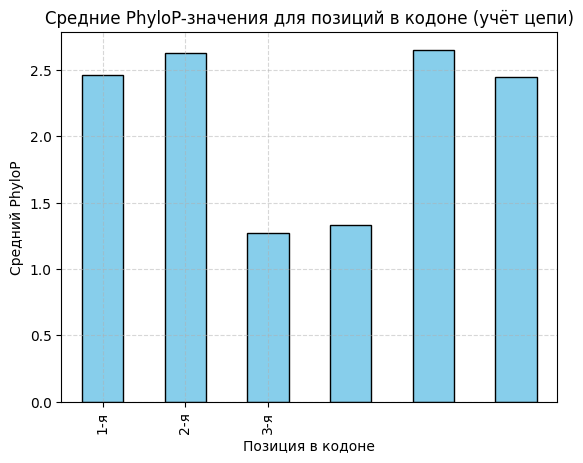

In [21]:
# Определяем позиции в кодоне с учетом цепи
def calculate_codon_position(row):
    if row["strand"] == "+":
        return (row["end"] - row["gff_start"]) % 3 + 1
    elif row["strand"] == "-":
        return (row["end"] - row["gff_start"]) % 3 + 4

cds_df["codon_position"] = cds_df.apply(calculate_codon_position, axis=1)

# Средние значения PhyloP для каждой позиции в кодоне**
codon_means = cds_df.groupby("codon_position")["phyloP"].mean()
print(codon_means)

# Визуализация трехнуклеотидной периодичности**
codon_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Средние PhyloP-значения для позиций в кодоне (учёт цепи)")
plt.xlabel("Позиция в кодоне")
plt.ylabel("Средний PhyloP")
plt.xticks([0, 1, 2], ["1-я", "2-я", "3-я"])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

codon_position
1    2.561573
2    2.534254
3    1.303958
Name: phyloP, dtype: float64


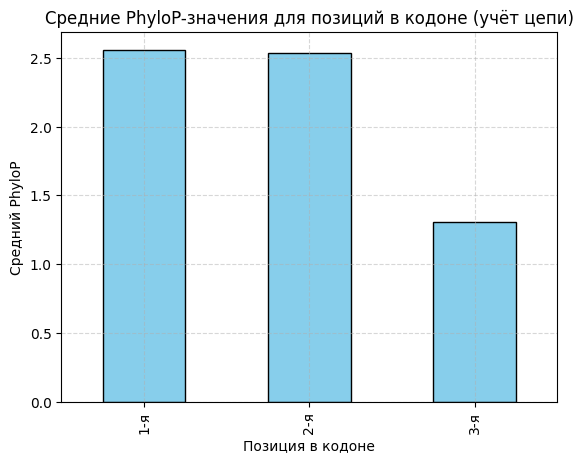

In [14]:
# Определяем позиции в кодоне с учетом цепи
def calculate_codon_position(row):
    if row["strand"] == "+":
        return (row["end"] - row["gff_start"]) % 3 + 1
    elif row["strand"] == "-":
        return (row["start"] - row["gff_start"]) % 3 + 1

cds_df["codon_position"] = cds_df.apply(calculate_codon_position, axis=1)

# Средние значения PhyloP для каждой позиции в кодоне**
codon_means = cds_df.groupby("codon_position")["phyloP"].mean()
print(codon_means)

# Визуализация трехнуклеотидной периодичности**
codon_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Средние PhyloP-значения для позиций в кодоне (учёт цепи)")
plt.xlabel("Позиция в кодоне")
plt.ylabel("Средний PhyloP")
plt.xticks([0, 1, 2], ["1-я", "2-я", "3-я"])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [19]:
# Среднее значения PhyloP по типам последовательности
feature_type_means = df.groupby("feature_type")["phyloP"].mean()
print(feature_type_means)

feature_type
CDS                          2.133220
chromosome                   0.613151
exon                         1.477955
five_prime_UTR               0.494385
gene                         1.288361
mRNA                         1.310737
mRNA_TE_gene                -1.444644
miRNA                        0.845054
ncRNA                        0.789092
protein                      1.490471
pseudogene                   0.259642
pseudogenic_exon             0.335100
pseudogenic_transcript       0.259642
snRNA                        3.921543
snoRNA                       2.227925
tRNA                         3.553900
three_prime_UTR              0.469949
transposable_element_gene   -1.446026
Name: phyloP, dtype: float64
